## Importing libraries/data

### Importing Libraries

In [1]:
# For general use
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# For our classifiers
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import neural_network
from sklearn import preprocessing

# For confusion matrix/data importing
from sklearn import metrics  
from sklearn.datasets import load_digits 

from PIL import Image

### Importing CSV data

In [2]:
file = "../../Data/CSV/"

print("Getting digits")
dfs_digi = []
for cls in ['0','1','2','3','4','5','6','7','8','9']:
    print(f"Loading {cls}.CSV...")
    a = pd.read_csv(file+cls+".csv", index_col=0)
    a['class'] = cls
    dfs_digi.append(a)
    
print("\nGetting math symbols")
dfs_math = []
for cls in ['+', ')', '(', ',', '-']:
    print(f"Loading {cls}.CSV...")
    a = pd.read_csv(file+cls+".csv", index_col=0)
    a['class'] = cls
    dfs_math.append(a)

print("\nGetting math symbols")
dfs_all = []
for cls in ['0','1','2','3','4','5','6','7','8','9','+28', ')28', '(28', ',28', '-28']:
    print(f"Loading {cls}.CSV...")
    a = pd.read_csv(file+cls+".csv", index_col=0)
    a['class'] = cls[0]
    dfs_all.append(a)
    
print("Concatenating Data...")
df_math = pd.concat(dfs_math,ignore_index=True, sort=False)
df_digi = pd.concat(dfs_digi,ignore_index=True, sort=False)
df_all  = pd.concat(dfs_all, ignore_index=True, sort=False)
print("Done")

Getting digits
Loading 0.CSV...
Loading 1.CSV...
Loading 2.CSV...
Loading 3.CSV...
Loading 4.CSV...
Loading 5.CSV...
Loading 6.CSV...
Loading 7.CSV...
Loading 8.CSV...
Loading 9.CSV...

Getting math symbols
Loading +.CSV...
Loading ).CSV...
Loading (.CSV...
Loading ,.CSV...
Loading -.CSV...

Getting math symbols
Loading 0.CSV...
Loading 1.CSV...
Loading 2.CSV...
Loading 3.CSV...
Loading 4.CSV...
Loading 5.CSV...
Loading 6.CSV...
Loading 7.CSV...
Loading 8.CSV...
Loading 9.CSV...
Loading +28.CSV...
Loading )28.CSV...
Loading (28.CSV...
Loading ,28.CSV...
Loading -28.CSV...
Concatenating Data...
Done


### Test/Train split

In [78]:
# Dfeatures = [feature for feature in df_digi]
# Dfeatures.remove("class")

# Dtrain_X = np.array(df_digi[df_digi.index%2 == 0][Dfeatures])
# Dtrain_y = df_digi[df_digi.index%2 == 0]["class"]
# Dtest_X = np.array(df_digi[df_digi.index%2 == 1][Dfeatures])
# Dtest_y = df_digi[df_digi.index%2 == 1]["class"]

# Mfeatures = [feature for feature in df_math]
# Mfeatures.remove("class")
# Mtrain_X = np.array(df_math[df_math.index%2 == 0][Mfeatures])
# Mtrain_y = df_math[df_math.index%2 == 0]["class"]
# Mtest_X = np.array(df_math[df_math.index%2 == 1][Mfeatures])
# Mtest_y = df_math[df_math.index%2 == 1]["class"]

# Afeatures = [feature for feature in df_all]
# Afeatures.remove("class")

# Atrain_X = np.array( df_all[df_all.index%2 == 0][Afeatures] )
# Atrain_y = df_all[df_all.index%2 == 0]["class"]

# Atest_X = np.array(df_all[df_all.index%2 == 1][Afeatures])
# Atest_y = df_all[df_all.index%2 == 1]["class"]


features = [x for x in df_all]
features.remove("class")

train = np.array(df_all[features].values)
test = df_all["class"]

In [127]:
K = 10
dfs_all_K = []
for df in dfs_all:
    dfs_all_K.append(pd.DataFrame(df.head(K)))

In [130]:
# for df in dfs_all_K:
#     df.values
    
dfs_all_K[2]

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,class
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
109,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
117,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [99]:
a = {}
a["test"] = 10
a["test"]

10

In [74]:
test = df_all[df_all.index%2 == 0][Afeatures]
test2 = Atrain_X[0]

print(test)
print(test2)

       0  1  2  3  4  5  6  7  8  9  ...  774  775  776  777  778  779  780  \
0      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
2      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
4      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
6      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
8      0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
...   .. .. .. .. .. .. .. .. .. ..  ...  ...  ...  ...  ...  ...  ...  ...   
28580  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
28582  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
28584  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
28586  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   
28588  0  0  0  0  0  0  0  0  0  0  ...    0    0    0    0    0    0    0   

       781  782  783  
0        0    0    0  
2    

## Testing classifiers
I conducted some "accuracy vs parameter" tests and found these to the be the optimal `n_neighbors` and `max_depth` values. In the future I will put those tests here

In [5]:
def test_CLF(clf, tests):
    print("Digit: ------\nFitting...")
    clf.fit(Dtrain_X, Dtrain_y)
    print("Scoring...")
    print("Score: ", clf.score(Dtest_X[:tests], Dtest_y[:tests]), "\n")

    print("Math: ------\nFitting...")
    clf.fit(Mtrain_X, Mtrain_y)
    print("Scoring...")
    print("Score: ", clf.score(Mtest_X[:tests], Mtest_y[:tests]), "\n")

    print("All: ------\nFitting...")
    clf.fit(Atrain_X, Atrain_y)
    print("Scoring...")
    print("Score: ", clf.score(Atest_X[:tests], Atest_y[:tests]), "\n")

In [92]:
# Kneighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
# test_CLF(clf, 100)
clf.fit(train, test)
with open('KN.pk', 'wb') as fout:
    pickle.dump(clf, fout)


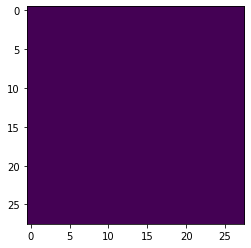

In [89]:
# plt.imshow(Atrain_X[0].reshape(28,28), cmap=plt.cm.binary)
# Atrain_X[10460]
# plt.imshow(Mtrain_X[1000].reshape(45,45))
# Mtrain_y[1000]

plt.imshow(train[19737].reshape(28,28))
# test[2000]

In [90]:
train[19737]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
df_all.groupby("class").count()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
class,,,,,,,,,,,,,,,,,,,,,
(,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
),1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
+,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
",",1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
-,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
0,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
1,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
2,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906
3,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906,...,1906,1906,1906,1906,1906,1906,1906,1906,1906,1906


In [94]:
# Decision Tree
clf = tree.DecisionTreeClassifier(random_state=42, max_depth=15)
# test_CLF(clf, 1000)
clf.fit(train, test)

with open('DT.pk', 'wb') as fout:
    pickle.dump(clf, fout)

In [84]:
# Gaussian Naive Bayes
clf = naive_bayes.GaussianNB()
clf.fit(train, test)
# test_CLF(clf, 2000)

GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
with open('gauss.pk', 'wb') as fout:
    pickle.dump(clf, fout)

### Finding most accurate hidden_layer_sizes value

In [9]:
# Using a small subset of data for faster results
data_portion = 500
Dtrain_X2 = np.array(df_digi[df_digi.index%data_portion == 0][Dfeatures])
Dtrain_y2 = df_digi[df_digi.index%data_portion == 0]["class"]
Dtest_X2 = np.array(df_digi[df_digi.index%data_portion == 1][Dfeatures])
Dtest_y2 = df_digi[df_digi.index%data_portion == 1]["class"]

Mtrain_X2 = np.array(df_math[df_math.index%data_portion == 0][Mfeatures])
Mtrain_y2 = df_math[df_math.index%data_portion == 0]["class"]
Mtest_X2 = np.array(df_math[df_math.index%data_portion == 1][Mfeatures])
Mtest_y2 = df_math[df_math.index%data_portion == 1]["class"]

Atrain_X2 = np.array(df_all[df_all.index%data_portion == 0][Afeatures])
Atrain_y2 = df_all[df_all.index%data_portion == 0]["class"]
Atest_X2 = np.array(df_all[df_all.index%data_portion == 1][Afeatures])
Atest_y2 = df_all[df_all.index%data_portion == 1]["class"]

# sc = preprocessing.StandardScaler()
# Dtrain_X2 = sc.fit_transform(Dtrain_X2)
# Dtest_X2 = sc.fit_transform(Dtest_X2)
# Mtrain_X2 = sc.fit_transform(Mtrain_X2)
# Mtest_X2 = sc.fit_transform(Mtest_X2)

In [10]:
# Recording scores
Dscores = []
Mscores = []
Ascores = []
MAX = 30
for hid in range(20, MAX):
    print(f"fitting and scoring hidden_layer_sizes={hid}...")
    clf = neural_network.MLPClassifier(hidden_layer_sizes=(hid),max_iter=3000, random_state=42)
    
    clf.fit(Dtrain_X2, Dtrain_y2)
    Dscores.append(clf.score(Dtest_X2, Dtest_y2))
    
    clf.fit(Mtrain_X2, Mtrain_y2)
    Mscores.append(clf.score(Mtest_X2, Mtest_y2))
    
    clf.fit(Atrain_X2, Atrain_y2)
    Ascores.append(clf.score(Atest_X2, Atest_y2))

fitting and scoring hidden_layer_sizes=20...
fitting and scoring hidden_layer_sizes=21...
fitting and scoring hidden_layer_sizes=22...
fitting and scoring hidden_layer_sizes=23...
fitting and scoring hidden_layer_sizes=24...
fitting and scoring hidden_layer_sizes=25...
fitting and scoring hidden_layer_sizes=26...
fitting and scoring hidden_layer_sizes=27...
fitting and scoring hidden_layer_sizes=28...
fitting and scoring hidden_layer_sizes=29...


In [11]:
for i, Dscore, Mscore, Ascore in zip(range(MAX), Dscores, Mscores, Ascores):
    print(f"hidden_layer_sizes ={i+20}  ::  {Dscore:3.3} :: {Mscore:3.3} :: {Ascore:3.3}" )

hidden_layer_sizes =20  ::  0.513 :: 0.55 :: 0.466
hidden_layer_sizes =21  ::  0.436 :: 0.7 :: 0.569
hidden_layer_sizes =22  ::  0.41 :: 0.65 :: 0.517
hidden_layer_sizes =23  ::  0.59 :: 0.5 :: 0.5
hidden_layer_sizes =24  ::  0.513 :: 0.45 :: 0.466
hidden_layer_sizes =25  ::  0.487 :: 0.55 :: 0.448
hidden_layer_sizes =26  ::  0.41 :: 0.7 :: 0.448
hidden_layer_sizes =27  ::  0.487 :: 0.55 :: 0.466
hidden_layer_sizes =28  ::  0.487 :: 0.6 :: 0.5
hidden_layer_sizes =29  ::  0.538 :: 0.65 :: 0.448


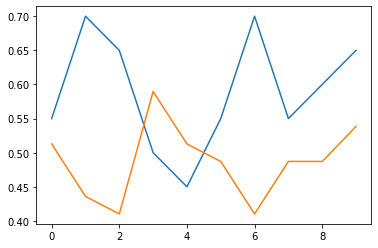

In [12]:
plt.plot(Mscores)
plt.plot(Dscores)
plt.show()

In [13]:
for i, Dscore, Mscore in zip(range(MAX), Dscores, Mscores):
    print("hidden_layer_sizes =", i+1, '  ::  ', Mscore, ' :: ', Dscore )

hidden_layer_sizes = 1   ::   0.55  ::  0.5128205128205128
hidden_layer_sizes = 2   ::   0.7  ::  0.4358974358974359
hidden_layer_sizes = 3   ::   0.65  ::  0.41025641025641024
hidden_layer_sizes = 4   ::   0.5  ::  0.5897435897435898
hidden_layer_sizes = 5   ::   0.45  ::  0.5128205128205128
hidden_layer_sizes = 6   ::   0.55  ::  0.48717948717948717
hidden_layer_sizes = 7   ::   0.7  ::  0.41025641025641024
hidden_layer_sizes = 8   ::   0.55  ::  0.48717948717948717
hidden_layer_sizes = 9   ::   0.6  ::  0.48717948717948717
hidden_layer_sizes = 10   ::   0.65  ::  0.5384615384615384


Clearly `hidden_layer_sizes=16` is the most accurate value.

Using this value, I will conduct accuracy testing with all of the data

In [14]:
data_portion = 19
Dtrain_X3 = np.array(df_digi[df_digi.index%data_portion != 0][Dfeatures])
Dtrain_y3 = df_digi[df_digi.index%data_portion != 0]["class"]
Dtest_X3 = np.array(df_digi[df_digi.index%data_portion == 0][Dfeatures])
Dtest_y3 = df_digi[df_digi.index%data_portion == 0]["class"]

Mtrain_X3 = np.array(df_math[df_math.index%data_portion != 0][Mfeatures])
Mtrain_y3 = df_math[df_math.index%data_portion != 0]["class"]
Mtest_X3 = np.array(df_math[df_math.index%data_portion == 0][Mfeatures])
Mtest_y3 = df_math[df_math.index%data_portion == 0]["class"]

Atrain_X3 = np.array(df_all[df_all.index%data_portion != 0][Afeatures])
Atrain_y3 = df_all[df_all.index%data_portion != 0]["class"]
Atest_X3 = np.array(df_all[df_all.index%data_portion == 0][Afeatures])
Atest_y3 = df_all[df_all.index%data_portion == 0]["class"]


sc = preprocessing.StandardScaler()
Dtrain_X3 = sc.fit_transform(Dtrain_X3)
Dtest_X3 = sc.fit_transform(Dtest_X3)
Mtrain_X3 = sc.fit_transform(Mtrain_X3)
Mtest_X3 = sc.fit_transform(Mtest_X3)


In [15]:
clf_digi = neural_network.MLPClassifier(hidden_layer_sizes=(39),max_iter=8000, random_state=42)
print("fitting...")
clf_digi.fit(Dtrain_X3, Dtrain_y3)
print("scoring...")
print("Digits scored:", clf_digi.score(Dtest_X3, Dtest_y3))

clf_math = neural_network.MLPClassifier(hidden_layer_sizes=(39),max_iter=8000, random_state=42)
print("fitting...")
clf_math.fit(Mtrain_X3, Mtrain_y3)
print("scoring...")
print("Math scored:", clf_math.score(Mtest_X3, Mtest_y3))

clf_all = neural_network.MLPClassifier(hidden_layer_sizes=(39),max_iter=8000, random_state=42)
print("fitting...")
clf_all.fit(Atrain_X3, Atrain_y3)
print("scoring...")
print("All scored:", clf_all.score(Atest_X3, Atest_y3))

fitting...
scoring...
Digits scored: 0.951195219123506
fitting...
scoring...
Math scored: 0.9820717131474104
fitting...
scoring...
All scored: 0.9408637873754153


In [16]:
import pickle
with open('clf_digi.pk', 'wb') as fout:
    pickle.dump(clf_digi, fout)
with open('clf_math.pk', 'wb') as fout:
    pickle.dump(clf_math, fout)
with open('clf_all.pk', 'wb') as fout:
    pickle.dump(clf_all, fout)

In [17]:
clf_digi2 = 10
clf_math2 = 10
clf_all2 = 10
with open('clf_digi.pk', 'rb') as fin:
    clf_digi2 = pickle.load(fin)
with open('clf_math.pk', 'rb') as fin:
    clf_math2 = pickle.load(fin)
with open('clf_all.pk', 'rb') as fin:
    clf_all2 = pickle.load(fin)  
    
print(clf_digi2.score(Dtest_X3, Dtest_y3))
print(clf_math2.score(Mtest_X3, Mtest_y3))
print(clf_all2.score(Atest_X3, Atest_y3))

0.951195219123506
0.9820717131474104
0.9408637873754153


### Testing time

In [18]:
# functions for testing
def compress_array(A, initx, inity, endx, endy):
    arr = (A.reshape(initx,inity)).astype('uint8') # sample array
    im = Image.fromarray(arr) # monochromatic image
    im = im.resize((endx,endy))
    return np.array(im)

def testImg(arr):
    initx = int(np.sqrt(len(arr)))
    inity = initx

    arrM = compress_array(arr, initx, inity, 45, 45).reshape(1,-1)
    arrD = compress_array(arr, initx, inity, 28, 28).reshape(1,-1)

    probM = clf_math.predict_proba(arrM)[0]
    probD = clf_digi.predict_proba(arrD)[0]
    probA = clf_all.predict_proba(arrD)[0]

    print("Math: ------------------------------")
    plt.imshow(arrM.reshape(45,45), cmap=plt.cm.binary)
    plt.title(clf_math.predict(arrM)[0])
    plt.show()
    for p, c in sorted(zip(probM, clf_math.classes_)):
        print(c, "  ::  ", p)

    print("\nDigit: ---------------------------")
    plt.imshow(arrD.reshape(28,28), cmap=plt.cm.binary)
    plt.title(clf_digi.predict(arrD)[0])
    plt.show()
    for p, c in sorted(zip(probD, clf_digi.classes_)):
        print(c, "  ::  ", p)

    print("\nAll: ------------------------------")
    plt.imshow(arrD.reshape(28,28), cmap=plt.cm.binary)
    plt.title(clf_all.predict(arrD)[0])
    plt.show()
    for p, c in sorted(zip(probA, clf_all.classes_)):
        print(c, "  ::  ", p)

In [21]:
# Functions for finding combined classification
def predict_as_dictionary(clf, arr, num):
    initx = int(np.sqrt(len(arr)))
    inity = initx
    arr2 = compress_array(arr, initx, inity, num, num).reshape(1,-1)
    return dict(zip(clf.classes_, clf.predict_proba(arr2)[0]))
def classify(arr):
    probM = predict_as_dictionary(clf_math, arr, 45)
    probD = predict_as_dictionary(clf_digi, arr, 28)
    probAll = predict_as_dictionary(clf_all, arr, 28)
    
    prob_M_D = {**probM, **probD}
    
    prob_true = {}
    for symbol in [',','-','+','(',')','1','2','3','4','5','6','7','8','9','0',]:
        prob_true[symbol] = probAll[symbol]*prob_M_D[symbol]

    print("\n\nCombined prediction ------------------------------------------")
    for i in sorted(zip(prob_true.values(), prob_true)):
        print(i)

Math: ------------------------------


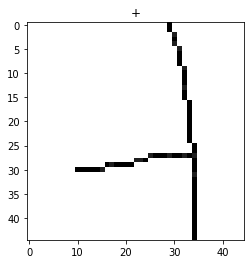

,   ::   2.2150686671498986e-11
-   ::   4.0903568449211987e-11
(   ::   5.39659621612845e-11
)   ::   4.165096531469558e-09
+   ::   0.9999999957178833

Digit: ---------------------------


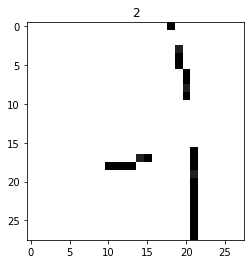

0   ::   8.973562785419288e-09
8   ::   1.9223999693658273e-08
9   ::   8.584225191556467e-06
4   ::   3.630681018763445e-05
3   ::   0.00012192035893165032
6   ::   0.0003635674556781592
5   ::   0.0005724356363355046
7   ::   0.0029659754427190407
1   ::   0.0101914996760197
2   ::   0.9857396821973742

All: ------------------------------


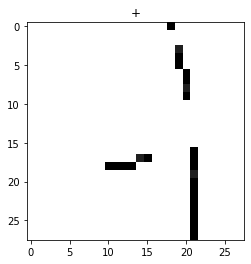

(   ::   1.8924580154065015e-22
-   ::   2.2972815981740847e-21
0   ::   6.974064350444451e-16
6   ::   1.0468158999681524e-12
1   ::   1.0866113676956405e-11
4   ::   2.1426513112621662e-11
,   ::   3.655180340676374e-09
9   ::   1.6022699592211265e-08
7   ::   9.212893809062316e-07
5   ::   5.748265954123146e-06
2   ::   1.805151331350376e-05
8   ::   0.0005094768244956557
3   ::   0.0008014290500641878
)   ::   0.0010786854418184785
+   ::   0.9975856679037534


Combined prediction ------------------------------------------
(1.0212831765124682e-32, '(')
(9.396701509802878e-32, '-')
(6.2582204318267666e-24, '0')
(8.096475445414528e-20, ',')
(3.8058819331486355e-16, '6')
(7.779283445628153e-16, '4')
(1.1074199401829444e-13, '1')
(1.3754246147620147e-13, '9')
(4.492828992264853e-12, ')')
(9.794182318030474e-12, '8')
(2.7325216794057113e-09, '7')
(3.2905122792741997e-09, '5')
(9.771051744207734e-08, '3')
(1.7794092996834865e-05, '2')
(0.9975856636319751, '+')


In [23]:
# Getting test data
num = 390
arr = Mtest_X3[10]

# Printing preliminary classifications
testImg(arr)

# Getting combined scores
classify(arr)

In [ ]:
arr.shape